# Uber Analysis
## Author : Ashish Kumar Patra
This data set is a masked data set which is similar to what data analysts at Uber handle. The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.

In [74]:
# Filtering out the warnings and importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Read the csv file using 'read_csv'.

df = pd.read_csv("C:/Users/ASHISH/Desktop/DataSets/Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [76]:
# Checking if the request id is duplicate

len(df["Request id"].unique())

6745

In [77]:
df.shape

(6745, 6)

**Request id has not duplicate values as length of request id array and shape of dataframe is equal.**

In [78]:
# Checking for Null Values

df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [79]:
# Percentage of Null Values

df.isnull().sum()/df.shape[0]*100     

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [80]:
# Checking for the TimeStamp is in DateTime Format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [81]:
df["Request timestamp"].value_counts()

11/7/2016 8:37         6
11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 9:40         6
12/7/2016 21:07        5
                      ..
15-07-2016 16:24:44    1
14-07-2016 21:01:34    1
15-07-2016 20:12:18    1
11/7/2016 6:34         1
14-07-2016 05:36:28    1
Name: Request timestamp, Length: 5618, dtype: int64

In [82]:
# df["Request timestamp"]=df["Request timestamp"].astype(str)   # Convert Request timestamp to string
# df["Request timestamp"]=df["Request timestamp"].replace("/","-")

# Convert timestamp to DateTime

df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)   
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)   

In [83]:
# Check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [84]:
# Extract Request hour and Request day from Request timestamp

req_hour = df["Request timestamp"].dt.hour
req_day = df["Request timestamp"].dt.day

In [85]:
# len(req_hour) and len(req_day) to check if it is 6745 or not

In [86]:
# Add col req_hour and req_day to the dataframe

df["req_hour"] = req_hour
df["req_day"] = req_day

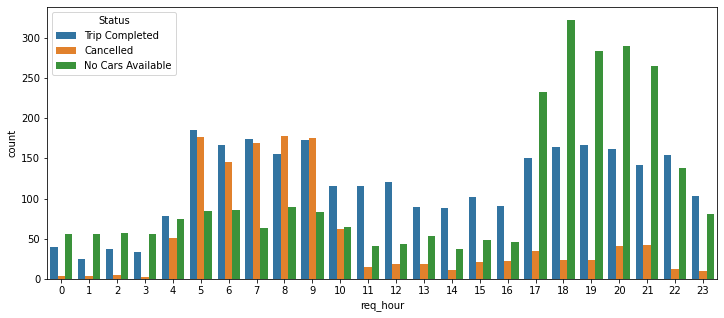

In [87]:
# Countplot of request hour based on status

plt.figure(figsize=(12,5))
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

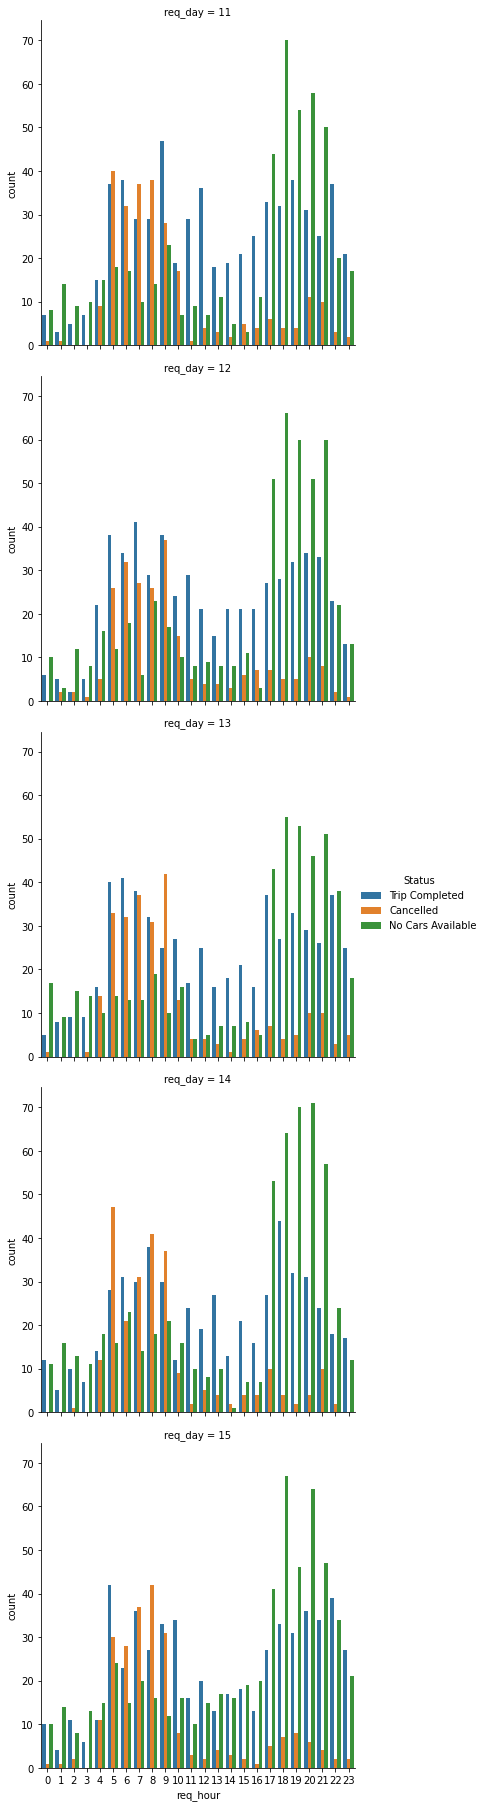

In [88]:
# Day wise Countplot of request hour based on status

sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

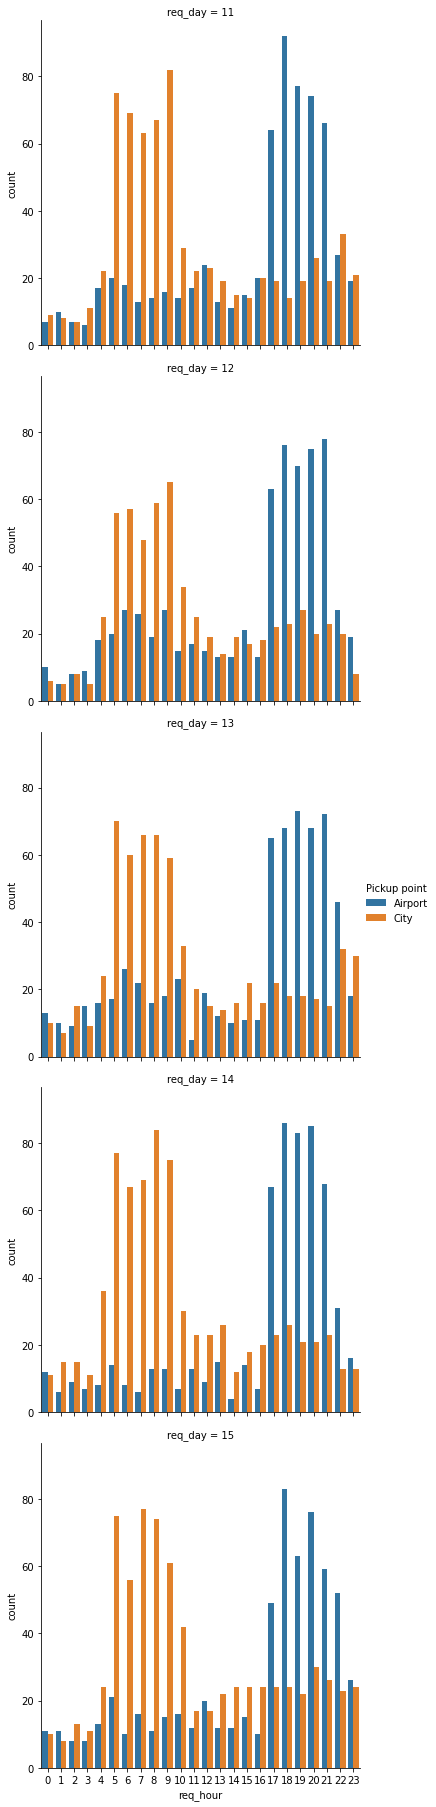

In [89]:
# Day wise Countplot of request hour based on pickup point

sns.factorplot(x="req_hour",data=df,row="req_day",hue="Pickup point",kind="count")
plt.show()

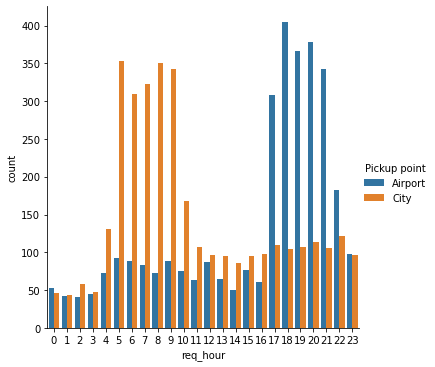

In [90]:
# All Day Countplot of request hour based on pickup point

sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [91]:
# Add a column Time_Slot to determine whether it is pre morning, evening etc (Different part of the day)

df["Time_Slot"] = 0
j = 0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [92]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [93]:
# Count the no of requests made in different part of the day

df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

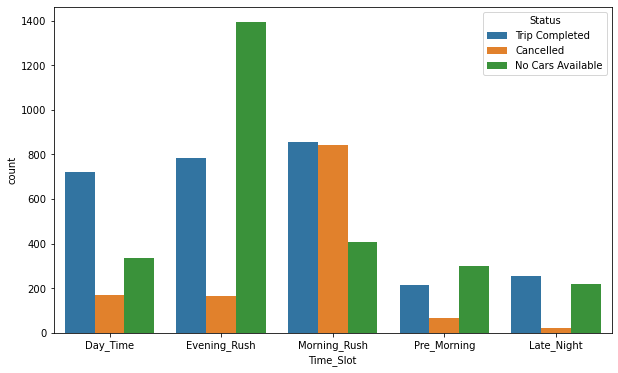

In [94]:
# Plot the Countplot for the time slot based on status

plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

# Morning Rush Overview

In [95]:
df_morning_rush = df[ df['Time_Slot'] == 'Morning_Rush' ]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

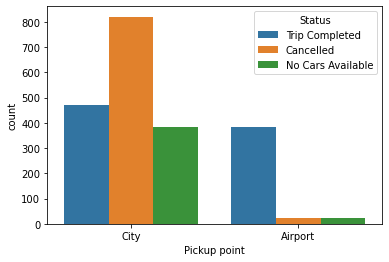

In [96]:
# Plot the Countplot for Pickup point in morning rush based on status

sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

## Supply and Demand for Morning Rush - City

In [97]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [98]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [99]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [100]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

- During Morning Rush, no of requests from City             :  1677
- During Morning Rush, no of cancelled requests from City   :   820
- During Morning Rush, no of trip completed from City       :   472
- During Morning Rush, no of No Cars Available from City    :   385

## Supply and Demand for Morning Rush - Airport

In [101]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [102]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [103]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [104]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

- During Morning Rush, no of requests from Airport          :  426
- During Morning Rush, no of cancelled requests from Airport   :   23
- During Morning Rush, no of trip completed from Airport       :  382
- During Morning Rush, no of No Cars Available from Airport    :   21

# Evening Rush Overview

In [105]:
df_evening_rush = df[df['Time_Slot']=='Evening_Rush']

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

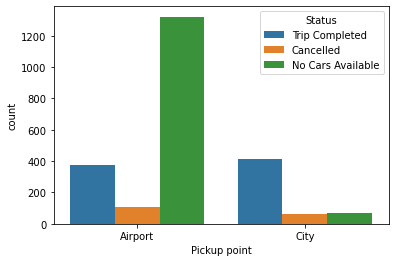

In [106]:
# Plot the Countplot for Pickup point in evening rush based on status

sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

## Supply and Demand for Evening Rush - City

In [107]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [108]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [109]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [110]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

- During Evening Rush, no of requests from City             :  542
- During Evening Rush, no of cancelled requests from City   :   60
- During Evening Rush, no of trip completed from City       :  411
- During Evening Rush, no of No Cars Available from City    :   71

## Supply and Demand for Evening Rush - Airport

In [111]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [112]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [113]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [114]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

- During Evening Rush, no of requests from Airport             :  1800
- During Evening Rush, no of cancelled requests from Airport   :   106
- During Evening Rush, no of trip completed from Airport       :   373
- During Evening Rush, no of No Cars Available from Airport    :  1321

# Pie Chart for Morning Rush - City

In [130]:
df_morning_city = df.loc[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Morning_Rush")]
df_morning_city

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [132]:
df_morning_city_count = pd.DataFrame(df_morning_city["Status"].value_counts())  # Converting Series to DataFrame

In [133]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [134]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

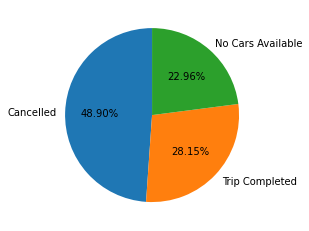

In [135]:
fig,ax = plt.subplots()
ax.pie(df_morning_city_count["Status"].values, labels = df_morning_city_count["Status"].index, 
       autopct="%.2f%%", startangle=90)
plt.show()

# Pie Chart for Evening Rush - Airport

In [140]:
df_evening_airport = df.loc[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Evening_Rush")]

In [137]:
df_evening_airport_count = pd.DataFrame(df_evening_airport["Status"].value_counts())

In [138]:
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


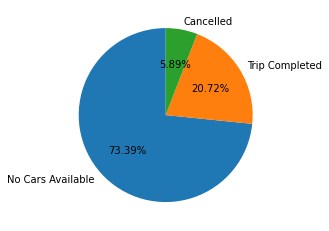

In [139]:
fig,ax = plt.subplots()
ax.pie(df_evening_airport_count["Status"].values, labels = df_evening_airport_count["Status"].index, 
       autopct="%.2f%%", startangle=90)
plt.show()

**`Inference 1 :`** They could be given a bonus for each trip they complete from the City to the Airport in the Evening Rush. This will ensure that less number of trips are cancelled.

**`Inference 2 :`** Uber can pay for the gas milege of drivers to come back to the city without a ride.

**`Inference 3 :`** Drivers can again be given bonus to complete a trip from the airport in the evening. This will ensure that the supply increases at the airport.

**`Inference 4 :`** Uber can also pay drivers to come without a passenger to the airport.

**`Inference 5 :`** Another way  could be to increase licences of car pooling taxis so that lesser number of cars can serve more passengers. 